In [140]:
import sklearn as sk
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree

#create dataframe called df. 
df = pd.read_csv('/drive/data/drug200.csv')

#print first 5 rows of data 
df_head = df.head()
print(df_head)

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY


In [128]:
print(df.dtypes)

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object


In [129]:
#Discriptive statistics
print(df.describe())

              Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000


In [130]:
#Identify any missing data
null_count = df.isna().sum()
print(null_count)
#no missing variable

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


In [131]:
#Find what types of values and how many appear in columns with non numerical data types
sex_value_count = df['Sex'].value_counts()
bp_value_count = df['BP'].value_counts()
Cholesterol_value_count = df['Cholesterol'].value_counts()
drug_value_count = df['Drug'].value_counts()
print(sex_value_count, bp_value_count, Cholesterol_value_count, drug_value_count)

Sex
M    104
F     96
Name: count, dtype: int64 BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64 Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64 Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64


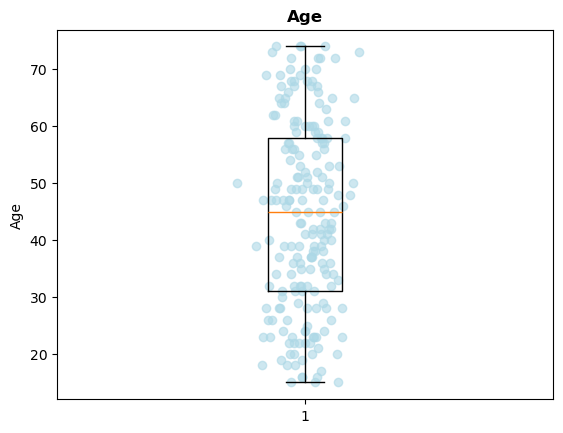

In [132]:
plt.figure()
#create boxplot
plt.boxplot(df['Age'])
#create random x coordinates for datapoints to add to scatter so that they don't all line up 
#where location is 1,
#set scale (jitter) at 0.04, so dots don't overlap, 
#set size as number of rows in Age column
x = np.random.normal(1,0.04, size = len(df['Age']))
#create scatter where x is position of dots, set opacity of dots (alpha) to 60% 
plt.scatter(x, df['Age'], color = 'lightblue', alpha = 0.6)
plt.ylabel('Age')
plt.title('Age', fontweight = 'bold')
plt.show()


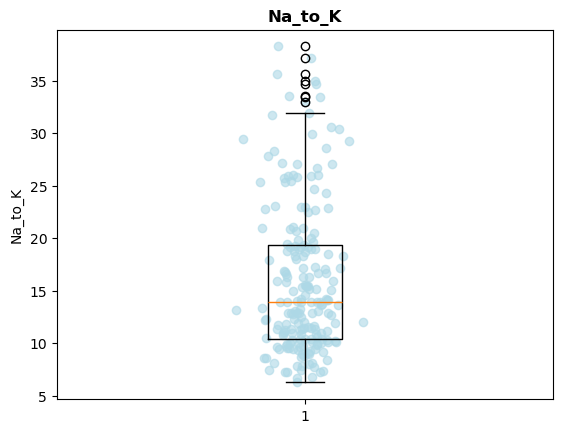

In [133]:
plt.figure()
#create boxplot
plt.boxplot(df['Na_to_K'])
#create random x coordinates for datapoints to add to scatter so that they don't all line up 
#where location is 1,
#set scale (jitter) at 0.04, so dots don't overlap, 
#set size as number of rows in Age column
x = np.random.normal(1,0.04, size = len(df['Na_to_K']))
#create scatter where x is position of dots, set opacity of dots (alpha) to 60% 
plt.scatter(x, df['Na_to_K'], color = 'lightblue', alpha = 0.6)
plt.ylabel('Na_to_K')
plt.title('Na_to_K', fontweight = 'bold')
plt.show()
#boxplot shows a number of outliers falling above max. 
#No reason to believe outliers are recording errors. Assume outliers are natural
#Decision trees are robust to outliers. Elect to keep outliers.

In [134]:
#Create a decision to predict the type of drug that might suit a patient
#Based on the patients age, sex, blood pressure, cholesterol and ratio of sodium to pottassium 
#set features and assign to x
x = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
#create numberical dummy values for desicion tree for non numberical columns
x = pd.get_dummies(x, columns = ['Sex', 'BP', 'Cholesterol'])
#set target variable
y = df['Drug']

#split data into training and test sets using sklearn, model_selection imported as train_test_split
#train_test_splitwhere trainign size is 70% and testing size is 30%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

#create decision tree
clf = DecisionTreeClassifier(criterion = 'gini', random_state = 42)
clf.fit(x_train, y_train)

#predict
y_pred = clf.predict(x_test)

#find accuracy
print('Accuracy: ',accuracy_score(y_test, y_pred), '\nClassification Report: \n', classification_report(y_test, y_pred))

#accuracy = 1.0. Perfect accuracy.
#Precision, recall, f-1 score are all 1.0. No misclassification occured
#Support is number of samples per class



Accuracy:  1.0 
Classification Report: 
               precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18
       drugY       1.00      1.00      1.00        26

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [135]:
#overfitting?
train_accuracy = clf.score(x_train, y_train)
test_accuracy = clf.score(x_test, y_test)
print(train_accuracy, test_accuracy)
#both are 1.0. Explained by small size of data set. Model may be too perfect and not work well on new data and may fail. Model may have memorized data.

1.0 1.0


In [136]:
#do same as before but prune by setting max_depth to 3
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

#train
clf.fit(x_train, y_train)

#predict
y_pred = clf.predict(x_test)

#find accuracy
print('Accuracy: ',accuracy_score(y_test, y_pred), '\nClassification Report: \n', classification_report(y_test, y_pred))
#Accuracy is 9 but decision tree ignored drug c. Drug c precision, recall, and f1-score are 0.

/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Accuracy:  0.9 
Classification Report: 
               precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       0.00      0.00      0.00         6
       drugX       0.75      1.00      0.86        18
       drugY       1.00      1.00      1.00        26

    accuracy                           0.90        60
   macro avg       0.75      0.80      0.77        60
weighted avg       0.82      0.90      0.86        60



In [137]:
#do same but use RandomForestClassifier instead of DecisionTreeClassifier. Random forest may work better on small classes.
#set number of trees to 10, due to small dataset, to avoid overfitting
rf = RandomForestClassifier(n_estimators = 10, criterion = 'gini', max_depth = None, class_weight = 'balanced', random_state = 42)

#train
rf.fit(x_train, y_train)

#predict
y_pred = rf.predict(x_test)

#print accuracy
print('Accuracy: ',accuracy_score(y_test, y_pred), '\nClassification Report: \n', classification_report(y_test, y_pred))
#Accuracy:  0.9666666666666667 
#random tree using 10 trees avoids over fitting and is therefore better suited to handeling new data from the real world. 


Accuracy:  0.9666666666666667 
Classification Report: 
               precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       0.60      1.00      0.75         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18
       drugY       1.00      0.92      0.96        26

    accuracy                           0.97        60
   macro avg       0.92      0.98      0.94        60
weighted avg       0.98      0.97      0.97        60



In [138]:
#Use cross validation to see how model performs on unseen data
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X = x, y = y, cv = 5)
print('Cross Validation Score: ', cv_scores, '\nAverage Cross Validation Score: \n', cv_scores.mean())
#model reacts well to new data. 

Cross Validation Score:  [1.  1.  1.  0.9 1. ] 
Average Cross Validation Score: 
 0.9800000000000001


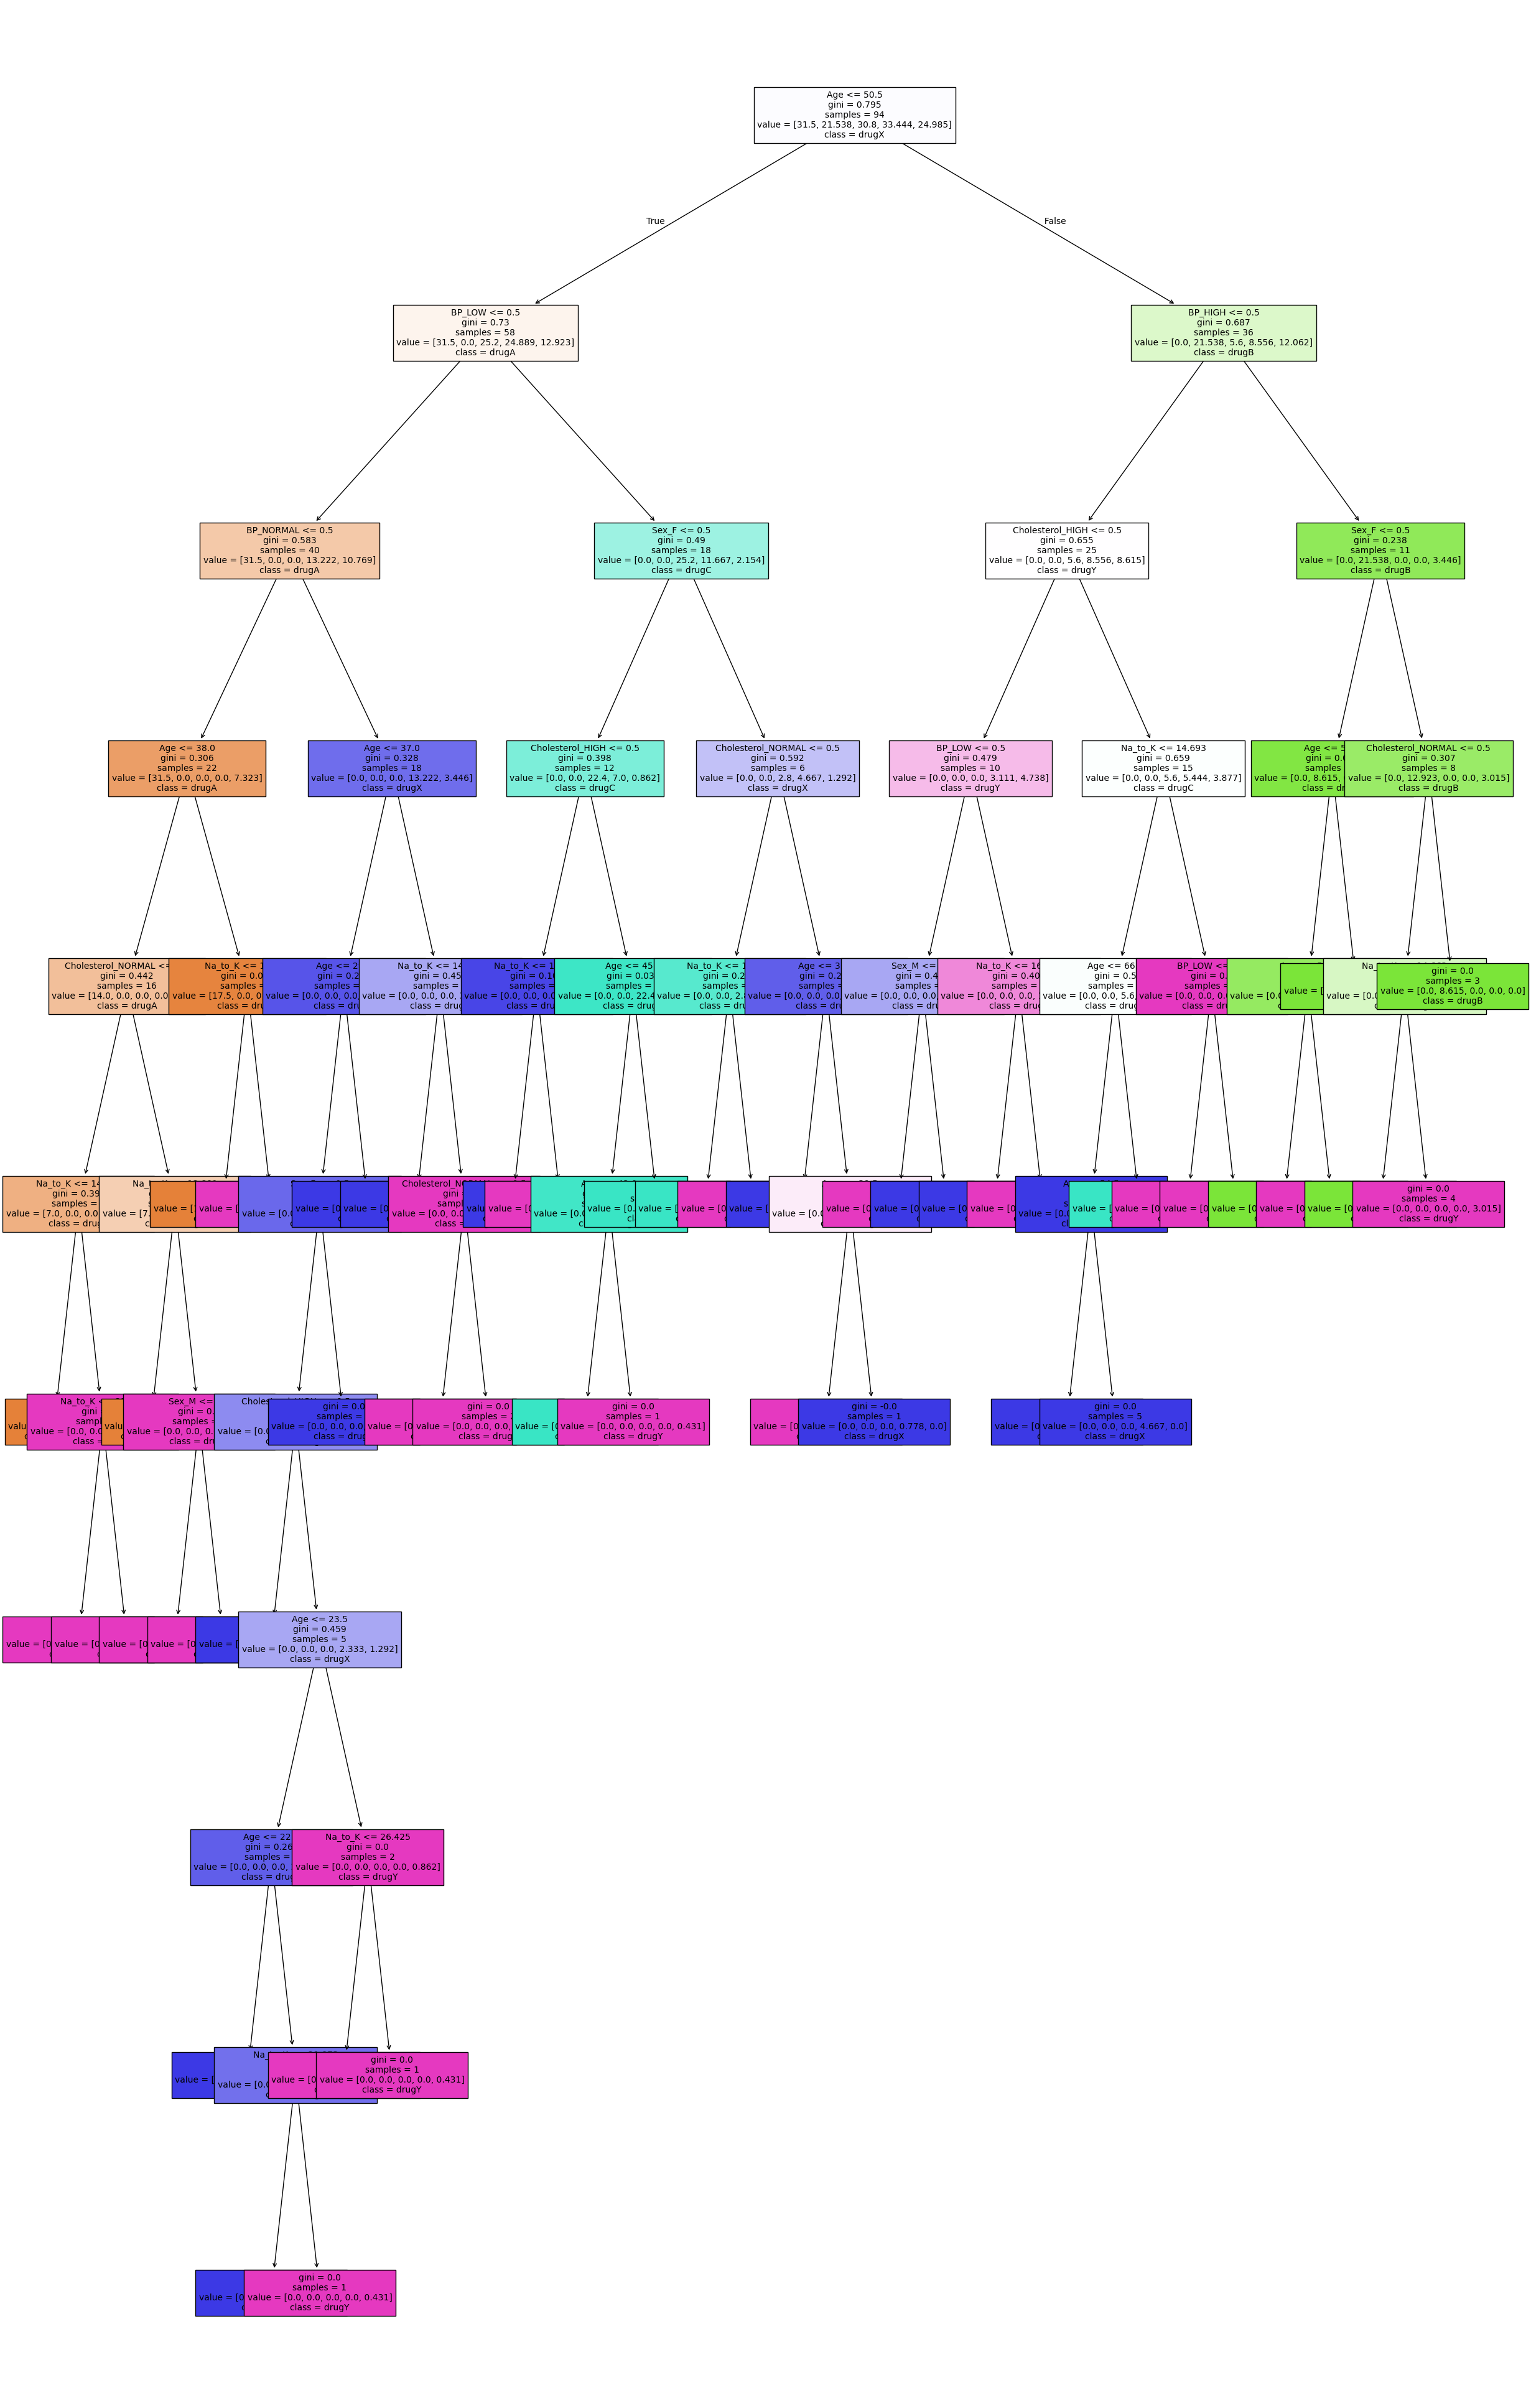

In [139]:
#visualize random tree
estimator = rf.estimators_[0]
plt.figure(figsize = (30,50))
plot_tree(estimator, feature_names = x.columns, class_names = rf.classes_, filled = True, fontsize = 10)
plt.show()
